<a href="https://colab.research.google.com/github/Shanthan0/Python/blob/main/Multiple_linear_regression_Introduction_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lesson:

 1. Multiple linear regression - Introduction
 
 

---

### Problem Statement

Many of your friends are worried about their chances of getting admission in their dream university for pursuing MS. So, you decided to help them by building a model which is capable of predicting their chance of getting admission in their dream masters program. This model will also help in understanding which factors are important in MS admissions and what are the scores required for different tests to have better admission chances.

Build a prediction model using multiple linear regression to predict the likelihood of getting admission and evaluate the accuracy of the model.






---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Finding Correlation
  
**Activity 3:** Train-Test Split

**Activity 4:**  Model Training

**Activity 5:** Model Prediction 

**Activity 6:** Model Evaluation







---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Admission_Predict** dataset using the below link. This dataset consists of several parameters which are considered important during the application for Masters program:


|Field|Description|
|---:|:---|
|Serial No.|Serial No.|
|GRE Score|GRE Scores ( out of 340 )|
|TOEFL Score|TOEFL Scores ( out of 120 )|
|University Rating|University Rating ( out of 5 )|
|SOP|Statement of Purpose Strength ( out of 5 )|
|LOR|Letter of Recommendation Strength ( out of 5 )|
|CGPA|Undergraduate GPA ( out of 10 )|
|Research|Research Experience ( either 0 or 1 )|
|Chance of Admit|Chance of Admit ( ranging from 0 to 1 )|



  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/Admission_Predict.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Also drop the column `Serial No.` from the dataset as it is of no use for analysis. Check whether the column names contain any trailing and leading spaces. If yes, remove the whitespaces from the column names.

**Hint:** You can use `strip()` and `rename()` functions to remove unwanted whitespaces from the column name and to rename them.






In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
# Load the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/Admission_Predict.csv'
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/Admission_Predict.csv')
# Print first five rows using head() function
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [ ]:
# Drop 'Serial No.' column from the DataFrame
df.drop(['Serial No.'],axis = 1,inplace = True)

In [ ]:
# Remove whitespaces from both ends in the column name if there are any
df.columns = df.columns.str.strip()
# Get list of all the columns after renaming.
df.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance of Admit'], dtype=object)

---

#### Activity 2: Finding Correlation

We need to predict the value of `Chance of Admit` variable, given other variables. Thus, `Chance of Admit` is the target variable and other columns except `Chance of Admit` are the feature variables.

Find the columns that are highly correlated with the `Chance of Admit` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualize these correlations.

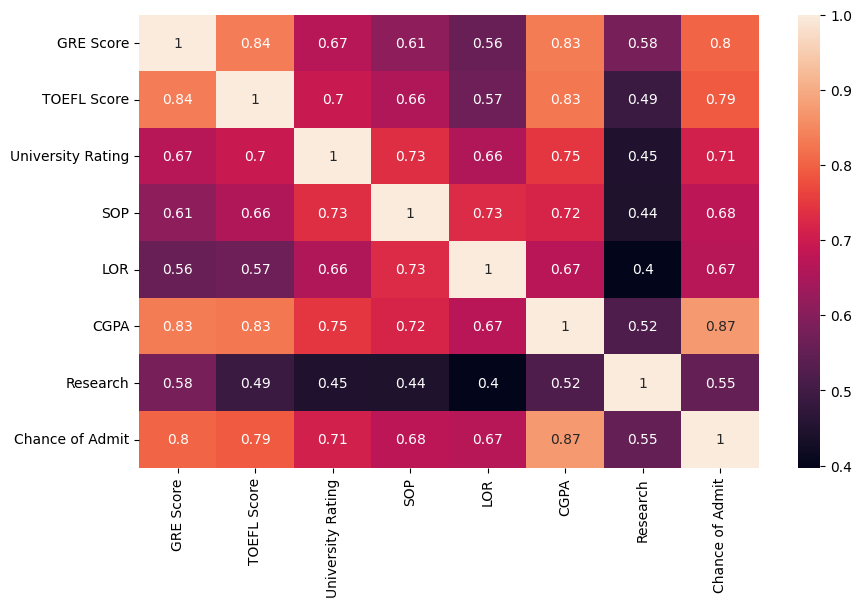

In [ ]:
# Calculate correlation coefficient for all columns of the DataFrame
corr = df.corr()
# Use heatmap to observe correlations.
plt.figure(figsize = (10,6),dpi = 100)
sns.heatmap(corr,annot = True)
plt.show()

**Q:** On observing the heatmap, which three scores seems most important for getting admission in an MS program?

**A:** CGPA, GRE Score, TOEFL Score

---

#### Activity 3: Train-Test Split


Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
features = list(df.columns.values)
features.remove('Chance of Admit')
x = df[features]
y = df['Chance of Admit']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)


---

#### Activity 4: Model Training

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Print the value of the intercept 
print(f'Interecept : {lr.intercept_}')
# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(features)):
  print(f'{features[i]} : {lr.coef_[i]}')


Interecept : -1.2841780563001732
GRE Score : 0.0018398110489447886
TOEFL Score : 0.0031707223988401735
University Rating : 0.004866255200303879
SOP : 0.00099469426171039
LOR : 0.01369460115951049
CGPA : 0.1178182318105514
Research : 0.018439128857490376


---

#### Activity 5: Model Prediction using Test Set

Predict the values for the test set by calling the `predict()` function on the LinearRegression object. 

Also, predict your friend's chances of getting admission into his dream university with a GRE score of 350, TOEFL score of 115, University Rating of 3, SOP of score 3, 3 LORs, CGPA of 9.8 and having research papers.

**Note:** Pass the values of all feature variables to the `predict()` function in the form of a 2D array as follows:

`predict([[350, 115, 3, 3, 3, 9.8, 1]])`

In [ ]:
# Predict the target variable values for test set
y_test_predict = lr.predict(x_test)

In [ ]:
# Make new prediction for your friend
print(lr.predict([[350, 115, 3, 3, 3, 9.8, 1]]))

[0.95611334]


**Q:** How much is your friend's chance of getting admission for MS?

**A:** 95.6%

---

#### Activity 6: Model Evaluation

Calculate the $R^2$, MSE, RMSE and MAE values for the test set to evaluate the accuracy of your model.

In [ ]:
# Evaluate the model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module for the test set.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f'R square: {r2_score(y_test,y_test_predict):3f}')
print(f'MSE: {mean_squared_error(y_test,y_test_predict):3f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_predict)):3f}')

R square: 0.795599
MSE: 0.004653
MAE: 0.049478
RMSE: 0.068212


---